In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv("student-por.csv",encoding = 'ISO-8859-1')
#0 femme 1 homme

data = data.drop(columns=['address','Mjob','Fjob','reason','guardian','famsup'])
data = data.drop(columns=['Pstatus'])
data.head()




,sex,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,paid,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,4,4,2,2,0,1,0,...,4,3,4,1,1,3,4,0,11,11
1,0,17,1,1,1,1,2,0,0,0,...,5,3,3,1,1,3,2,9,11,11
2,0,15,0,1,1,1,2,0,1,0,...,4,3,2,2,3,3,6,12,13,12
3,0,15,1,4,2,1,3,0,0,0,...,3,2,2,1,1,5,0,14,14,14
4,0,16,1,3,3,1,2,0,0,0,...,4,3,2,1,2,5,0,11,13,13


In [43]:
n = data.shape[0]
p = data.shape[1]
print(n,p)

X=data.loc[:, data.columns[0]:data.columns[0+p-1]].to_numpy().reshape([n,p])
print(X)

1044 25
[[ 0 18  1 ...  0 11 11]
 [ 0 17  1 ...  9 11 11]
 [ 0 15  0 ... 12 13 12]
 ...
 [ 1 21  1 ... 10  8  7]
 [ 1 18  0 ... 11 12 10]
 [ 1 19  0 ...  8  9  9]]


In [44]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
pca = PCA(2)
pca_alcool = pca.fit_transform(X)

print(pca_alcool.shape)
print(pca.explained_variance_ratio_.sum())
comp = pca.components_




(1044, 2)
0.24115832561974973


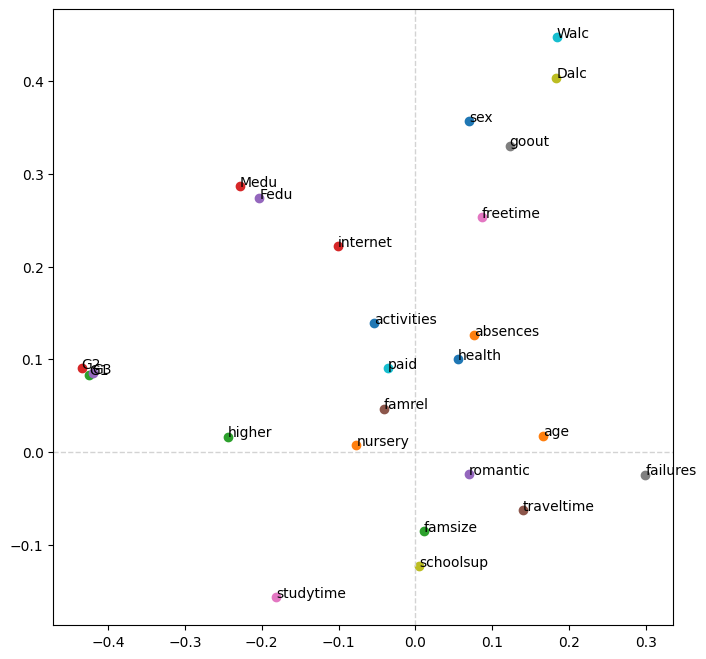

In [45]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
ax.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for i in range(comp.shape[1]):
        x,y = comp[0,i], comp[1,i]
        ax.scatter(x,y)
        ax.text(x,y,data.columns[i])

plt.savefig("acp.png", bbox_inches='tight')


plt.show()


In [46]:
# on garde le sex, Walc, Dalc, go out,freetime,absence,health,internet,paid,activities,Medu,Fedu.

data = data.drop(columns=['higher','G1','G2','G3','nursery','romantic','traveltime','studytime','schoolsup','failures'])
data.head()

,sex,age,famsize,Medu,Fedu,paid,activities,internet,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,18,1,4,4,0,0,0,4,3,4,1,1,3,4
1,0,17,1,1,1,0,0,1,5,3,3,1,1,3,2
2,0,15,0,1,1,0,0,1,4,3,2,2,3,3,6
3,0,15,1,4,2,0,1,1,3,2,2,1,1,5,0
4,0,16,1,3,3,0,0,0,4,3,2,1,2,5,0


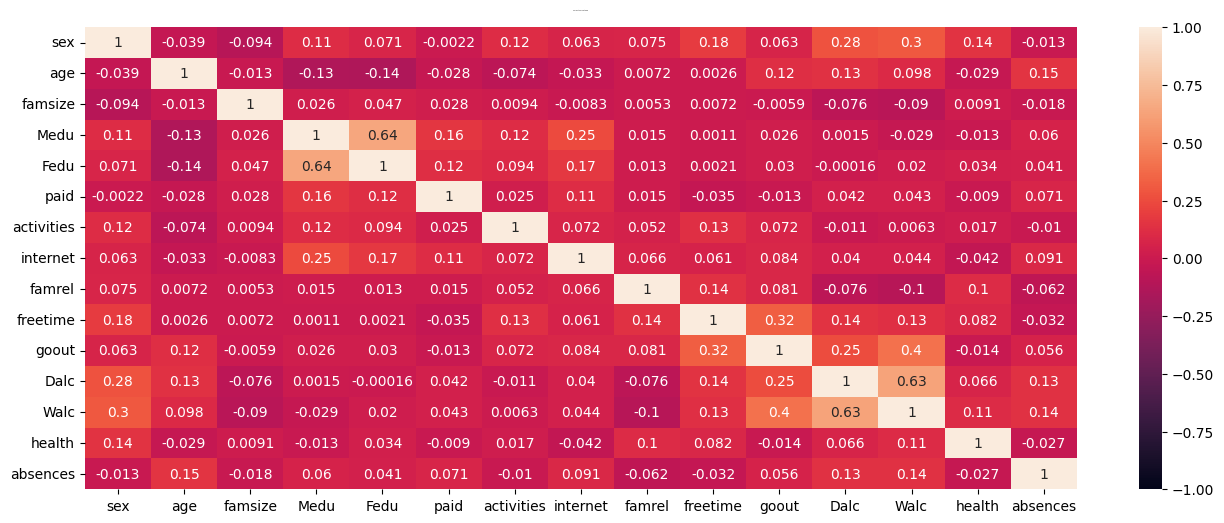

In [50]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':1}, pad=12)

plt.savefig("heatmap.png", bbox_inches='tight')

In [48]:

import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split


# La colonne que l'on cherche à prédire
target = "Dalc"

# x stocke les entrées
x = np.array(data.loc[:, data.columns != target])
# y stocke les sorties  
y = np.array(data[target])

# On divise en un set d'entraînement et un set de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

# Création du modèle : 14 entrée, 2 couches cachées de 20 et 10 neurones, 1 valeur de sortie
activation="relu"
model = Sequential([
    Dense(x.shape[0]-1, activation=activation),
    Dense(20, activation=activation),
    Dense(10, activation=activation),
    Dense(1),
])

# On indique au réseau de neurones quel algorithme d'optimisation et quelle fonction de coût utiliser
model.compile(optimizer="adam", loss="mean_squared_error")

# Et on lance l'entraînement sur le set d'entraînement
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))
#plot_history(history)
plt.show()

# On vérifie que le modèle fonctionne sur des valeurs qu'il ne connaît pas avec le set de test
# La valeur affichée est la Mean Absolute Error : c'est donc une moyenne des erreurs commises
# Remarque : le modèle a plus de mal sur les valeurs extrêmes. Sur une valeur "normale", l'erreur sera probablement plus petite que ça
model.evaluate(x_test, y_test)

Epoch 1/15
27/27 [==============================] - 1s 8ms/step - loss: 0.5848 - val_loss: 0.5564
Epoch 2/15
27/27 [==============================] - 0s 4ms/step - loss: 0.4609 - val_loss: 0.5212
Epoch 3/15
27/27 [==============================] - 0s 3ms/step - loss: 0.4266 - val_loss: 0.5207
Epoch 4/15
27/27 [==============================] - 0s 3ms/step - loss: 0.4417 - val_loss: 0.5289
Epoch 5/15
27/27 [==============================] - 0s 4ms/step - loss: 0.4103 - val_loss: 0.4737
Epoch 6/15
27/27 [==============================] - 0s 3ms/step - loss: 0.4041 - val_loss: 0.4762
Epoch 7/15
27/27 [==============================] - 0s 4ms/step - loss: 0.3952 - val_loss: 0.4729
Epoch 8/15
27/27 [==============================] - 0s 3ms/step - loss: 0.4031 - val_loss: 0.4788
Epoch 9/15
27/27 [==============================] - 0s 3ms/step - loss: 0.3919 - val_loss: 0.5135
Epoch 10/15
27/27 [==============================] - 0s 3ms/step - loss: 0.4155 - val_loss: 0.4551
Epoch 11/15
27/27 [

0.454629510641098

In [49]:
test = np.array([[0,19,1,5,4,0,4,3,5,4,5,5,5,1]])
model(test)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.9365015]], dtype=float32)>